In [1]:
import pandas as pd

# Dataset Accesos
velocidad_por_prov = pd.read_excel('Internet.xlsx', sheet_name='Velocidad % por prov')
accesos_por_tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Accesos Por Tecnología')
penetracion_poblacion = pd.read_excel('Internet.xlsx', sheet_name='Penetración-poblacion')
penetracion_hogares = pd.read_excel('Internet.xlsx', sheet_name='Penetracion-hogares')
accesos_por_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Accesos por rangos')

# Dataset Totales
totales_vmd = pd.read_excel('Internet.xlsx', sheet_name='Totales VMD')
totales_accesos_tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
totales_dial_baf = pd.read_excel('Internet.xlsx', sheet_name='Totales Dial-BAf')
penetracion_totales = pd.read_excel('Internet.xlsx', sheet_name='Penetracion-totales')
totales_accesos_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos por rango')

# Dataset Ingresos
ingresos = pd.read_excel('Internet.xlsx', sheet_name='Ingresos ')


In [2]:
# Estandarizar nombres de columnas, por ejemplo:
penetracion_poblacion.rename(columns={'Accesos por cada 100 hab': 'Accesos_por_100_hab'}, inplace=True)
penetracion_hogares.rename(columns={'Accesos por cada 100 hogares': 'Accesos_por_100_hogares'}, inplace=True)


In [3]:
# Merge de velocidad_sin_rangos y accesos_por_tecnologia
dataset_accesos = pd.merge(velocidad_por_prov, accesos_por_tecnologia, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Añadir penetración en población
dataset_accesos = pd.merge(dataset_accesos, penetracion_poblacion, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Añadir penetración en hogares
dataset_accesos = pd.merge(dataset_accesos, penetracion_hogares, on=['Año', 'Trimestre', 'Provincia'], how='left')

# Opcional: Añadir accesos por velocidad
dataset_accesos = pd.merge(dataset_accesos, accesos_por_velocidad, on=['Año', 'Trimestre', 'Provincia'], how='left')


In [4]:
dataset_accesos.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,...,Accesos_por_100_hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
0,2024,2,Buenos Aires,157.41,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,...,79.84,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,233.01,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,...,116.37,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,97.38,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,...,68.81,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,107.76,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,...,44.06,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,21.67,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,...,86.33,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [5]:
# Merge de totales_vmd y totales_accesos_tecnologia
dataset_totales = pd.merge(totales_vmd, totales_accesos_tecnologia, on=['Año', 'Trimestre'], how='left')

# Añadir totales de Dial-BAf
dataset_totales = pd.merge(dataset_totales, totales_dial_baf, on=['Año', 'Trimestre'], how='left')

# Añadir penetración total
dataset_totales = pd.merge(dataset_totales, penetracion_totales, on=['Año', 'Trimestre'], how='left')

# Añadir totales de accesos por velocidad
dataset_totales = pd.merge(dataset_totales, totales_accesos_velocidad, on=['Año', 'Trimestre'], how='left')


In [6]:
dataset_totales.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,...,Periodo,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,139.25,Abr-Jun 2024,733491,5867504,4169958,593197,191957,11556107,...,Abr-Jun 2024,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,139.15,Ene-Mar 2024,774475,5986957,4015101,598682,257941,11633156,...,Ene-Mar 2024,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,139.04,Oct-Dic 2023,836390,6022532,3908183,585760,194796,11547661,...,Oct-Dic 2023,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,129.67,Jul-Sept 2023,897895,6018832,3708718,581436,200027,11406908,...,Jul-Sept 2023,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,123.95,Abr-Jun 2023,1006509,5997149,3463988,581823,202428,11251897,...,Abr-Jun 2023,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [7]:
# Merge de ingresos con dataset_totales para obtener ingresos por acceso
dataset_ingresos = pd.merge(ingresos, dataset_totales[['Año', 'Trimestre', 'Total']], on=['Año', 'Trimestre'], how='left')

# Calcular Ingresos por Acceso
dataset_ingresos['Ingresos_por_Acceso'] = dataset_ingresos['Ingresos (miles de pesos)'] / dataset_ingresos['Total']


In [8]:
print(dataset_accesos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      1008 non-null   object 
 1   Trimestre                1008 non-null   object 
 2   Provincia                1008 non-null   object 
 3   Mbps (Media de bajada)   1008 non-null   float64
 4   ADSL                     935 non-null    float64
 5   Cablemodem               935 non-null    float64
 6   Fibra óptica             935 non-null    float64
 7   Wireless                 935 non-null    float64
 8   Otros                    935 non-null    float64
 9   Total_x                  935 non-null    float64
 10  Accesos_por_100_hab      1000 non-null   float64
 11  Accesos_por_100_hogares  1000 non-null   float64
 12  HASTA 512 kbps           976 non-null    float64
 13  + 512 Kbps - 1 Mbps      976 non-null    float64
 14  + 1 Mbps - 6 Mbps       

El dataset dataset_accesos tiene muy pocos nulos, menos del uno porcionto por lo que no deberia afectar nuestro estudio. Vamos a ver si los dejamos asi o si los sustituimos por la media o moda mas adelante.

In [9]:
dataset_accesos.describe()

,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,Accesos_por_100_hab,Accesos_por_100_hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
count,1008.000000,9.350000e+02,9.350000e+02,9.350000e+02,935.000000,935.000000,9.350000e+02,1000.000000,1000.000000,976.000000,976.000000,9.760000e+02,976.000000,976.000000,976.000000,9.760000e+02,970.000000,9.760000e+02
mean,24.720245,1.111734e+05,1.813500e+05,5.068236e+04,12521.217112,6252.917647,3.619799e+05,15.727248,52.794973,1970.910861,9008.724385,1.351150e+05,38350.821721,37337.189549,20226.475410,1.167879e+05,6366.817526,3.651248e+05
std,33.660764,2.343735e+05,4.456130e+05,1.811240e+05,21094.980530,11205.863643,7.762910e+05,9.240063,24.135063,12803.616123,20525.797913,3.257649e+05,64384.540287,89052.894873,70027.801169,4.518615e+05,15214.131513,7.836545e+05
min,2.573729,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04,2.723000,9.513970,6.000000,0.000000,1.124000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,4.866698,1.936850e+04,1.088700e+04,3.540000e+02,811.000000,316.000000,6.211900e+04,9.018188,33.957657,41.000000,374.750000,2.417200e+04,3759.250000,2592.250000,41.000000,1.300000e+01,0.000000,6.145700e+04
50%,10.089315,4.323000e+04,4.020500e+04,3.115000e+03,5199.000000,1852.000000,1.138340e+05,13.674812,50.133004,107.000000,2217.500000,4.285500e+04,13439.500000,10266.500000,1573.000000,3.631500e+03,251.500000,1.113830e+05
75%,29.875292,8.468550e+04,7.736050e+04,3.213100e+04,14344.500000,7056.000000,1.956520e+05,20.323973,67.010861,467.000000,6900.250000,8.391125e+04,42094.250000,26463.750000,10109.250000,3.986825e+04,6679.000000,1.939920e+05
max,234.440000,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06,52.236739,124.061394,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125547.000000,5.044557e+06


El dataset_accesos contiene 1008 registros y 21 columnas. Las columnas clave como 'Año', 'Trimestre' y 'Provincia' no presentan valores nulos, lo cual es esencial para nuestro análisis.

Sin embargo, hay algunas columnas con valores nulos:

Tecnologías de acceso ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total_x'): presentan alrededor de 73 valores nulos cada una.
Penetración de internet ('Accesos_por_100_hab', 'Accesos_por_100_hogares'): tienen 8 valores nulos cada una.
Accesos por rango de velocidad ('HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', etc.): presentan entre 32 y 38 valores nulos.
Es importante manejar estos valores nulos antes de continuar con el análisis.

A su vez podemos notar una aplia variabilidad en los datos con algunos valores maximos y minimos a varias desviaciones estandar de distancia lo que podria estar delatando posibles outliers.

In [10]:
# Identificar columnas con valores nulos
columnas_con_nulos = dataset_accesos.columns[dataset_accesos.isnull().any()]
print("Columnas con valores nulos:", columnas_con_nulos)

Columnas con valores nulos: Index(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total_x',
       'Accesos_por_100_hab', 'Accesos_por_100_hogares', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total_y'],
      dtype='object')


In [11]:
# Identificar columnas con valores nulos
columnas_con_nulos = dataset_accesos.columns[dataset_accesos.isnull().any()]
print("Columnas con valores nulos:", columnas_con_nulos)

# Manejo de valores nulos en las columnas de tecnologías de acceso
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total_x']
for col in tecnologias:
    # Reemplazar nulos por 0, asumiendo que la ausencia de datos significa cero accesos
    dataset_accesos[col].fillna(0, inplace=True)

# Manejo de valores nulos en 'Accesos_por_100_hab' y 'Accesos_por_100_hogares'
# Utilizamos la mediana para imputar los valores nulos
dataset_accesos['Accesos_por_100_hab'].fillna(dataset_accesos['Accesos_por_100_hab'].median(), inplace=True)
dataset_accesos['Accesos_por_100_hogares'].fillna(dataset_accesos['Accesos_por_100_hogares'].median(), inplace=True)

# Manejo de valores nulos en las columnas de rangos de velocidad
rangos_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                    '+ 30 Mbps', 'OTROS', 'Total_y']

for col in rangos_velocidad:
    # Reemplazar nulos por 0
    dataset_accesos[col].fillna(0, inplace=True)

# Verificar que no queden valores nulos
print("Valores nulos restantes:\n", dataset_accesos.isnull().sum())


Columnas con valores nulos: Index(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total_x',
       'Accesos_por_100_hab', 'Accesos_por_100_hogares', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total_y'],
      dtype='object')
Valores nulos restantes:
 Año                        0
Trimestre                  0
Provincia                  0
Mbps (Media de bajada)     0
ADSL                       0
Cablemodem                 0
Fibra óptica               0
Wireless                   0
Otros                      0
Total_x                    0
Accesos_por_100_hab        0
Accesos_por_100_hogares    0
HASTA 512 kbps             0
+ 512 Kbps - 1 Mbps        0
+ 1 Mbps - 6 Mbps          0
+ 6 Mbps - 10 Mbps         0
+ 10 Mbps - 20 Mbps        0
+ 20 Mbps - 30 Mbps        0
+ 30 Mbps                  0
OTROS                      0
Total_y                  

C:\Users\User\AppData\Local\Temp\ipykernel_3284\1595174427.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_accesos[col].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3284\1595174427.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Evaluemos la presencia de posibles outliers

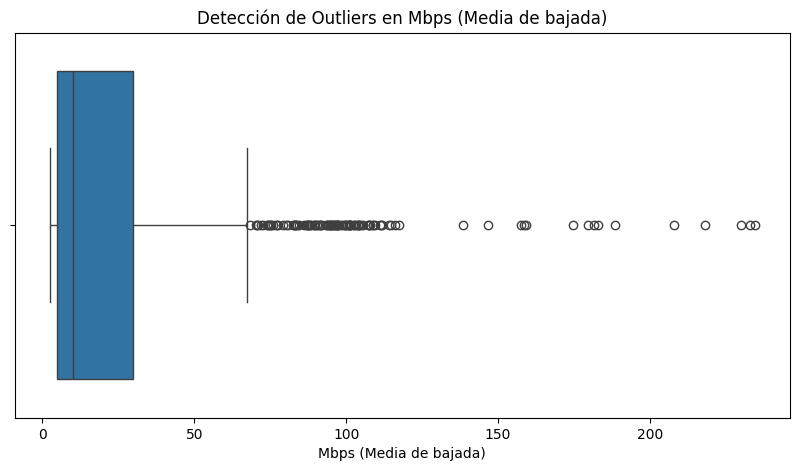

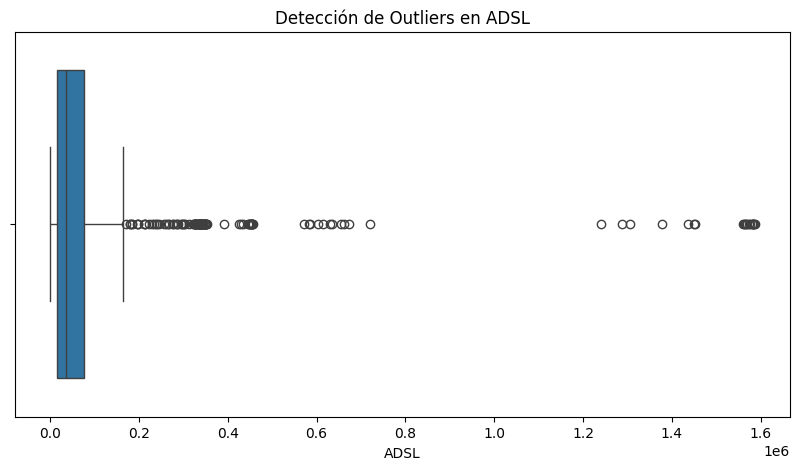

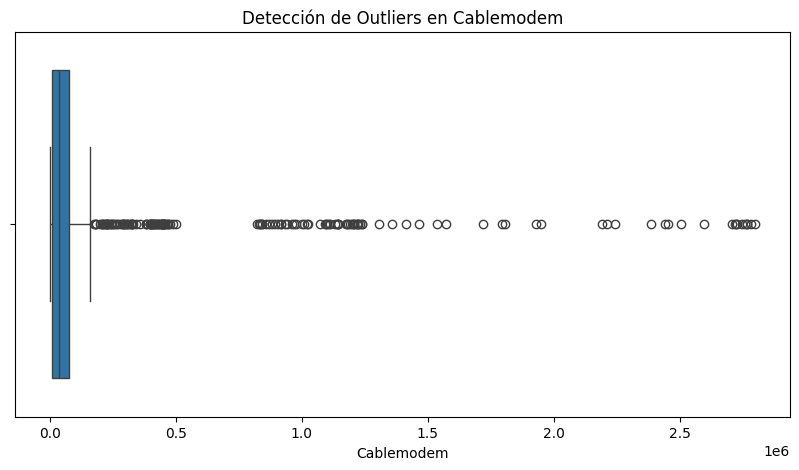

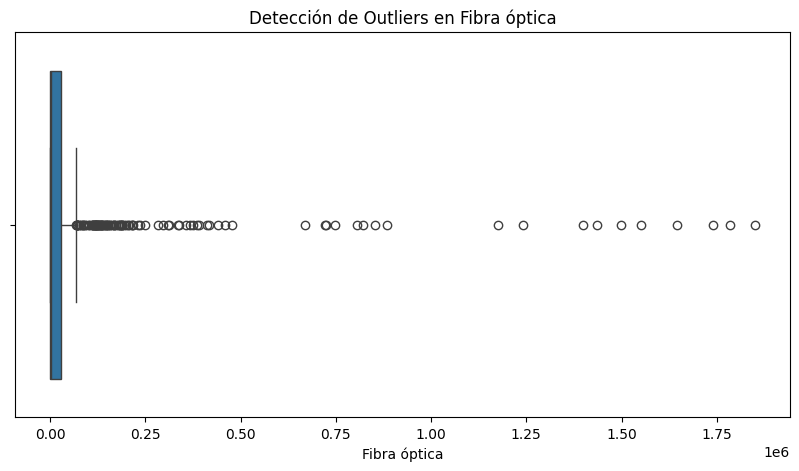

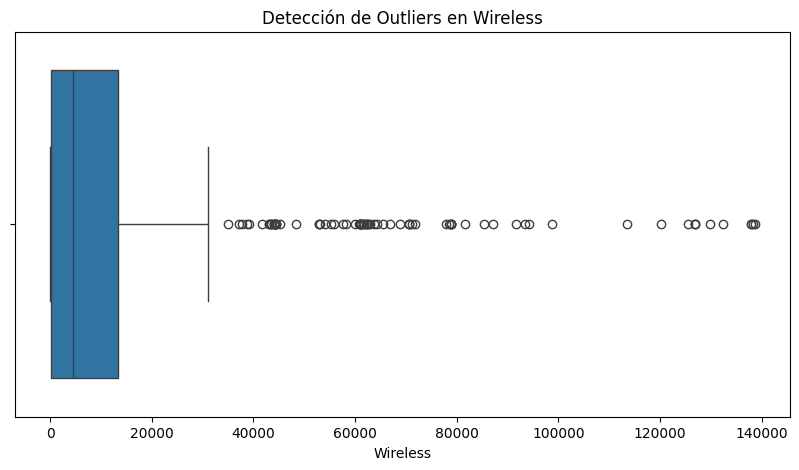

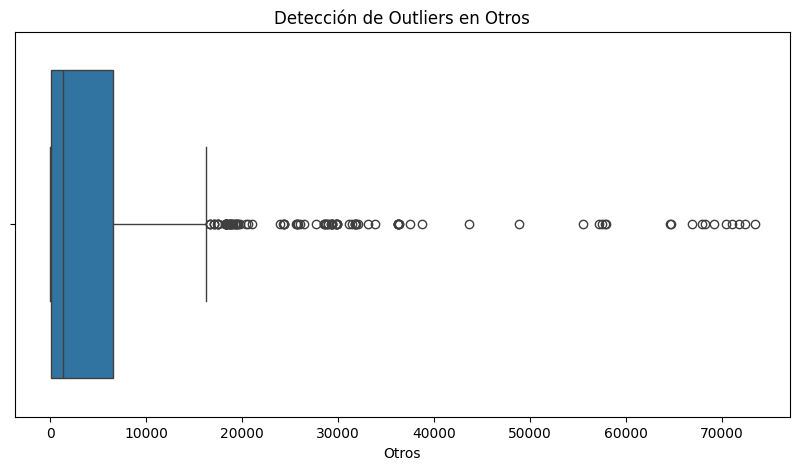

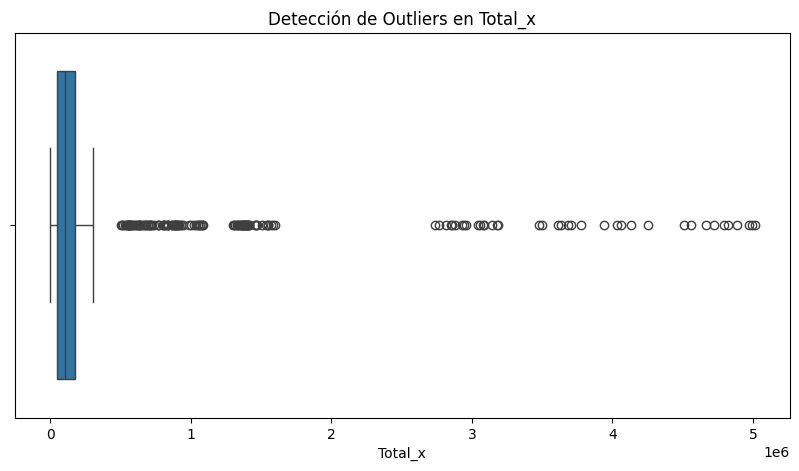

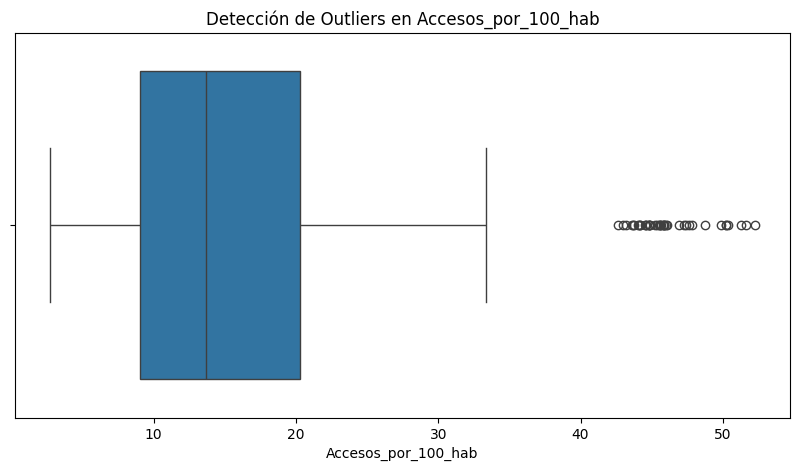

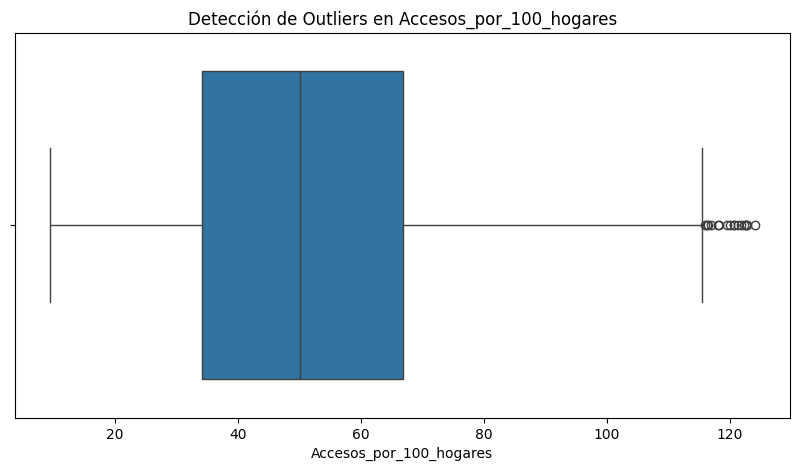

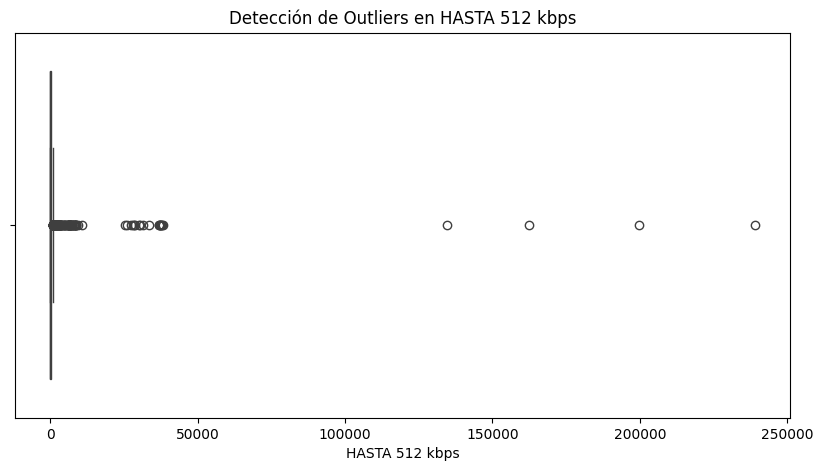

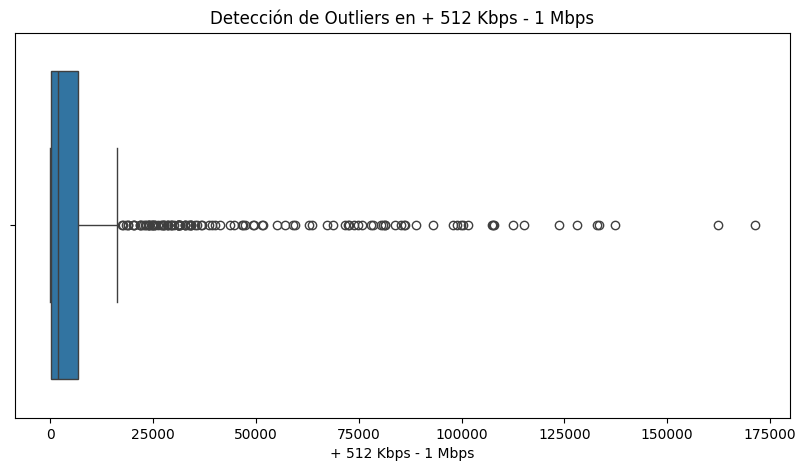

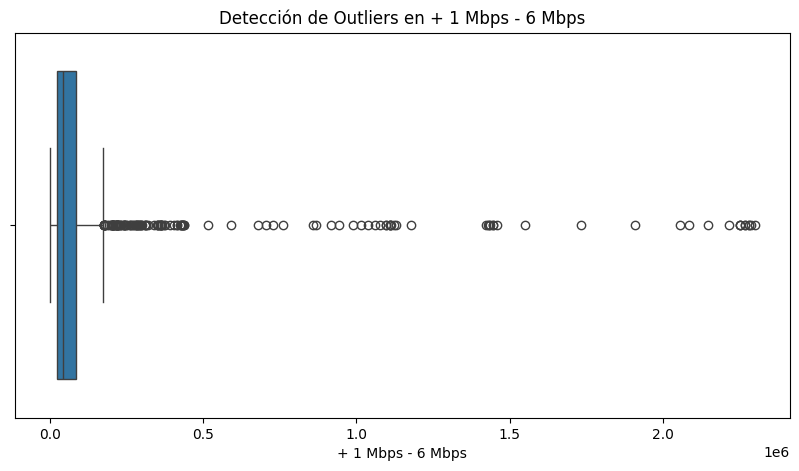

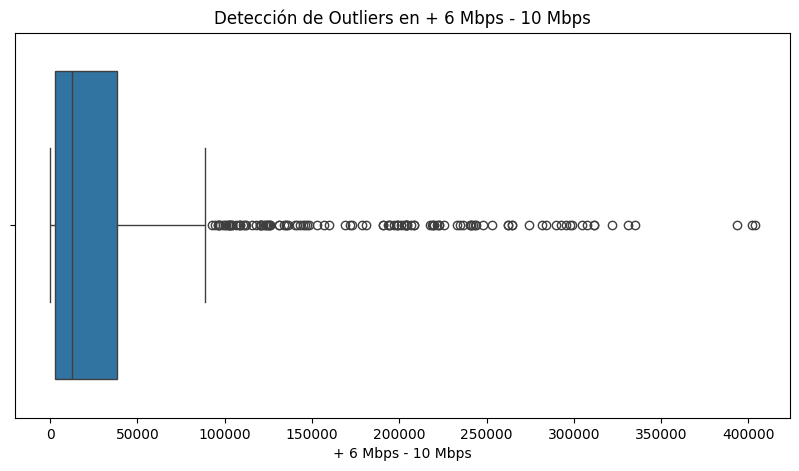

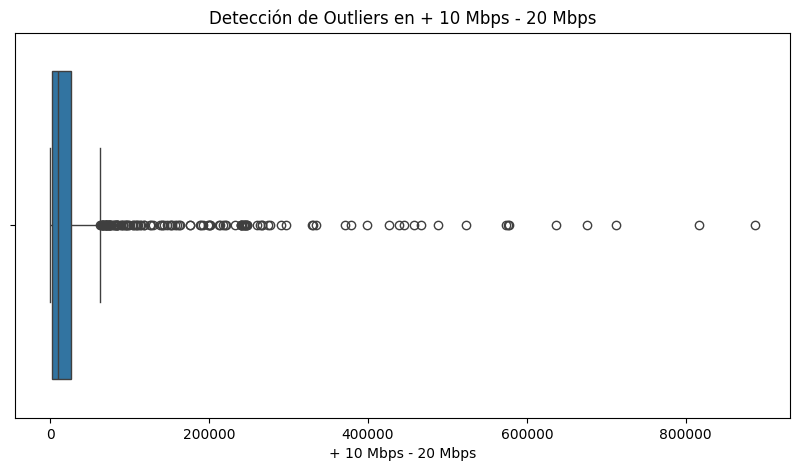

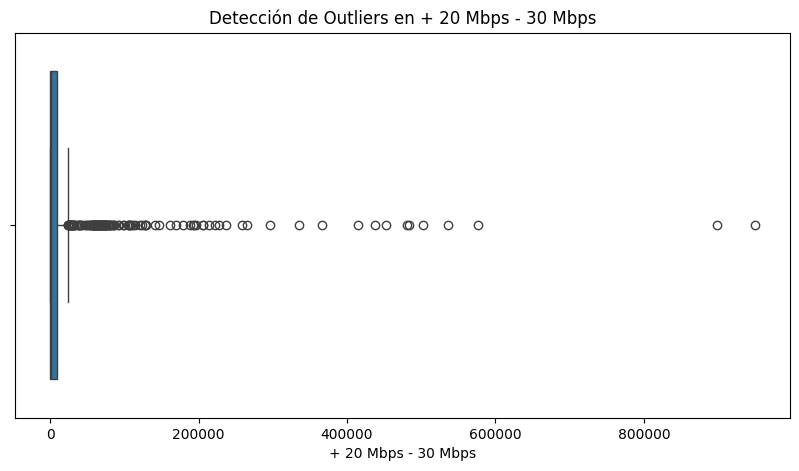

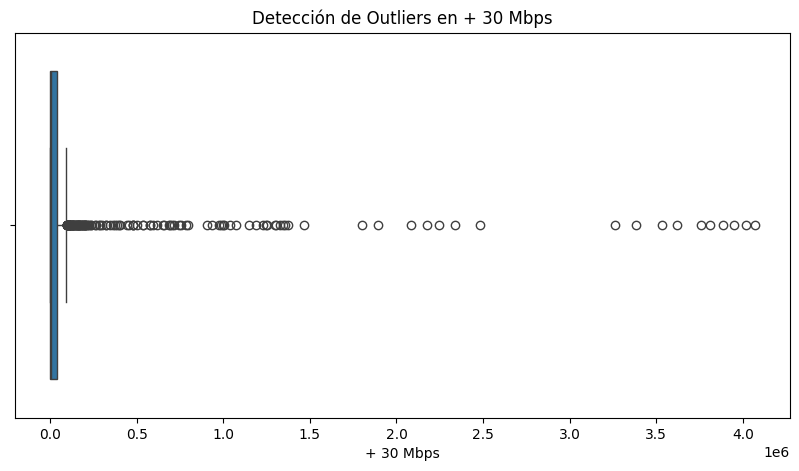

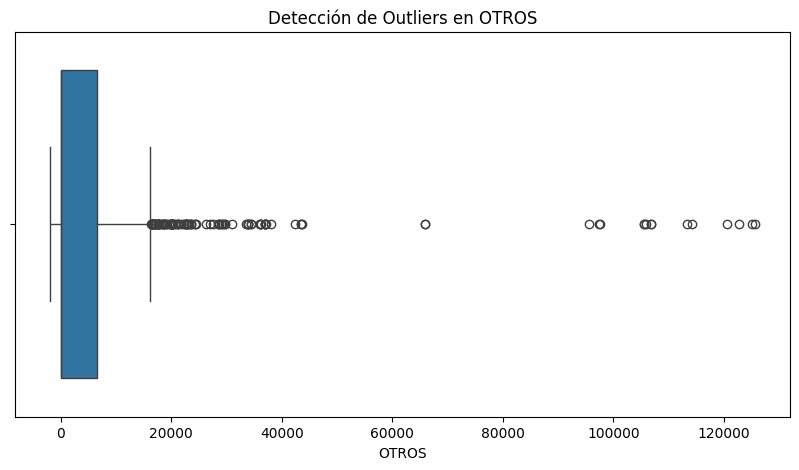

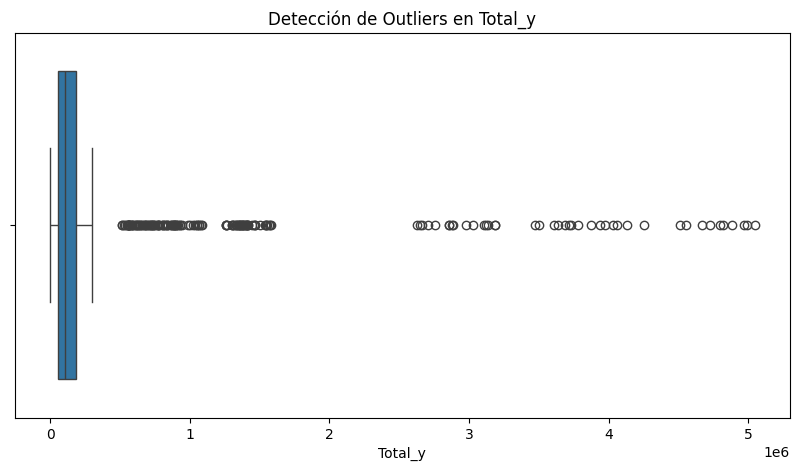

Número de outliers en Mbps (Media de bajada): 111
Número de outliers en ADSL: 125
Número de outliers en Cablemodem: 155
Número de outliers en Fibra óptica: 109
Número de outliers en Wireless: 80
Número de outliers en Otros: 110
Número de outliers en Total_x: 155
Número de outliers en Accesos_por_100_hab: 42
Número de outliers en Accesos_por_100_hogares: 17
Número de outliers en HASTA 512 kbps: 165
Número de outliers en + 512 Kbps - 1 Mbps: 113
Número de outliers en + 1 Mbps - 6 Mbps: 140
Número de outliers en + 6 Mbps - 10 Mbps: 118
Número de outliers en + 10 Mbps - 20 Mbps: 126
Número de outliers en + 20 Mbps - 30 Mbps: 130
Número de outliers en + 30 Mbps: 140
Número de outliers en OTROS: 117
Número de outliers en Total_y: 163


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas a analizar
columnas_numericas = ['Mbps (Media de bajada)', 'ADSL', 'Cablemodem', 'Fibra óptica',
                      'Wireless', 'Otros', 'Total_x', 'Accesos_por_100_hab',
                      'Accesos_por_100_hogares', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps',
                      '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps',
                      '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total_y']

# Generar boxplots para visualizar outliers
for col in columnas_numericas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=dataset_accesos[col])
    plt.title(f'Detección de Outliers en {col}')
    plt.xlabel(col)
    plt.show()

# Calcular estadísticas para identificar outliers
Q1 = dataset_accesos[columnas_numericas].quantile(0.25)
Q3 = dataset_accesos[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Determinar límites inferiores y superiores para cada variable
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Mostrar el número de outliers en cada columna
for col in columnas_numericas:
    outliers_col = dataset_accesos[(dataset_accesos[col] < limite_inferior[col]) | (dataset_accesos[col] > limite_superior[col])]
    num_outliers = outliers_col.shape[0]
    print(f'Número de outliers en {col}: {num_outliers}')


### Podemos ver:

* Alta Variabilidad: Las variables presentan una gran variabilidad y valores extremos, reflejando diferencias entre provincias y periodos.
* Importancia de los Datos Extremos: Los outliers pueden representar situaciones reales, como provincias con alta penetración de internet o rápidas velocidades de conexión, que son relevantes para nuestro estudio.

Dado que los outliers pueden ser datos válidos y proporcionan información valiosa, especialmente en un análisis a nivel nacional y provincial, decidimos mantener para el analicis.

### Sigamos con el dataser de Totales

In [13]:
dataset_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Mbps (Media de bajada)        42 non-null     float64
 3   Trimestre.1                   42 non-null     object 
 4   ADSL                          42 non-null     int64  
 5   Cablemodem                    42 non-null     int64  
 6   Fibra óptica                  42 non-null     int64  
 7   Wireless                      42 non-null     int64  
 8   Otros                         42 non-null     int64  
 9   Total_x                       42 non-null     int64  
 10  Periodo_x                     42 non-null     object 
 11  Banda ancha fija              42 non-null     int64  
 12  Dial up                       42 non-null     int64  
 13  Total_y

Este dataset tiene un total de 26 columnas y 42 filas en las cuales no parecen haber nulos lo cual tiene sentido siendo un dataset de totales ya que es menos comun la falta de datos.

In [14]:
dataset_totales.describe()

,Año,Trimestre,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,Banda ancha fija,...,Accesos por cada 100 hab,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,4.200000e+01,4.200000e+01,...,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,4.200000e+01
mean,2018.761905,2.452381,39.334762,2.694844e+06,4.433906e+06,1.224694e+06,304293.214286,158186.071429,8.815923e+06,8.794433e+06,...,19.574600,46756.595238,215615.285714,3.176365e+06,9.154819e+05,8.844276e+05,4.783656e+05,2.909772e+06,154081.071429,8.780865e+06
std,3.074756,1.130560,43.643195,1.094347e+06,1.319783e+06,1.321136e+06,203202.399993,82363.507846,1.733189e+06,1.742229e+06,...,3.268665,48922.973593,192134.704593,1.552136e+06,2.293758e+05,4.515900e+05,4.334343e+05,3.138715e+06,132453.955052,1.772655e+06
min,2014.000000,1.000000,3.617127,7.334910e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06,6.362108e+06,...,15.050104,5675.000000,28521.000000,8.402000e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.250000,6.038428,1.730869e+06,3.146292e+06,1.719410e+05,85390.500000,70430.000000,7.218131e+06,7.189537e+06,...,16.519507,29027.750000,69951.750000,1.692724e+06,8.623452e+05,6.774355e+05,1.358035e+05,3.291400e+04,0.000000,7.151638e+06
50%,2019.000000,2.000000,18.855000,3.061623e+06,4.535507e+06,6.989465e+05,292223.000000,185221.000000,8.720658e+06,8.704688e+06,...,19.395586,34960.000000,150273.000000,3.313002e+06,9.787620e+05,7.929725e+05,3.612495e+05,1.408279e+06,176235.500000,8.720658e+06
75%,2021.000000,3.000000,51.370000,3.713298e+06,5.857192e+06,1.945689e+06,515434.000000,244069.500000,1.038873e+07,1.037650e+07,...,22.603664,41057.500000,279159.250000,4.780396e+06,1.058518e+06,1.022656e+06,5.925450e+05,5.761285e+06,242214.000000,1.038873e+07
max,2024.000000,4.000000,139.250000,3.803024e+06,6.073426e+06,4.169958e+06,598682.000000,265328.000000,1.163316e+07,1.162136e+07,...,24.790000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.363694e+06,414754.000000,1.163316e+07


Este dataset que está agrupado por trimestre no parece ser tan variable en comparación al otro agrupado por provincia, lo que sugiere que la localidad es más determinante que la época en la variabilidad. Evaluaremos más adelante si esta hipótesis es verdadera.

Con el mismo razonamiento que con el dataset anterior y viendo que es mucho menos variable, vamos a omitir la evaluación de los outliers.

### Breve evaluacion de ingresos

In [15]:
dataset_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos),Total,Ingresos_por_Acceso
count,42.000000,42.000000,4.200000e+01,4.100000e+01,41.000000
mean,2019.000000,2.452381,5.001648e+07,8.720840e+06,4.608280
std,3.728597,1.130560,8.710208e+07,1.750929e+06,7.470990
min,2014.000000,1.000000,2.984054e+06,6.272846e+06,0.475710
25%,2016.000000,1.250000,7.055326e+06,7.144696e+06,0.967868
50%,2019.000000,2.000000,2.047527e+07,8.648135e+06,2.315033
75%,2021.000000,3.000000,4.485090e+07,1.008554e+07,4.263524
max,2033.000000,4.000000,4.420322e+08,1.163316e+07,38.250958


Le maximo de años (2023) probablemente sea un error, habria que corregirlo.

In [16]:
dataset_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
 4   Total                      41 non-null     float64
 5   Ingresos_por_Acceso        41 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.1+ KB


In [17]:
dataset_ingresos.tail(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Total,Ingresos_por_Acceso
32,2016,2,6.534241e+06,Abr-Jun 2016,7172464.0,0.911018
33,2016,1,5.936845e+06,Ene-Mar 2016,6835285.0,0.868558
34,2015,4,5.376899e+06,Oct-Dic 2015,6916766.0,0.777372
35,2015,3,5.153739e+06,Jul-Sept 2015,6852988.0,0.752043
36,2015,2,4.701791e+06,Abr-Jun 2015,6786105.0,0.692856
37,2015,1,4.876385e+06,Ene-Mar 2015,6623212.0,0.736257
38,2014,4,3.950441e+06,Oct-Dic 2014,6475485.0,0.610061
39,2014,3,3.478638e+06,Jul-Sept 2014,6367671.0,0.546297
40,2014,2,3.270816e+06,Abr-Jun 2014,6348745.0,0.515191
41,2014,1,2.984054e+06,Ene-Mar 2014,6272846.0,0.475710


In [18]:
dataset_ingresos.head(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Total,Ingresos_por_Acceso
0,2024,2,4.420322e+08,Abr-Jun 2024,11556107.0,38.250958
1,2024,1,3.461990e+08,Ene-Mar 2024,11633156.0,29.759679
2,2023,4,1.673760e+08,Oct-Dic 2023,11547661.0,14.494365
3,2023,3,1.331066e+08,Jul-Sept 2023,11406908.0,11.668946
4,2023,2,1.180603e+08,Jun-Mar 2023,11251897.0,10.492478
5,2033,1,1.041350e+08,Ene-Mar 2023,NaN,NaN
6,2022,4,7.244348e+07,Oct-Dic 2022,11208114.0,6.463486
7,2022,3,6.408678e+07,Jul-Sept 2022,11091128.0,5.778203
8,2022,2,6.041950e+07,Abr-Jun 2022,10958684.0,5.513390
9,2022,1,5.521931e+07,Ene-Mar 2022,10624009.0,5.197597


Asumimos que fue un error de tipeo ya que esta en la posicion de 2023 y es el valor que esta faltando para ese año. Vamos a corregirlo.

In [19]:
ingresos.loc[dataset_ingresos['Año'] == 2033, 'Año'] = 2023

In [20]:
# Merge de ingresos con dataset_totales para obtener ingresos por acceso
dataset_ingresos = pd.merge(ingresos, dataset_totales[['Año', 'Trimestre', 'Total']], on=['Año', 'Trimestre'], how='left')

# Calcular Ingresos por Acceso
dataset_ingresos['Ingresos_por_Acceso'] = dataset_ingresos['Ingresos (miles de pesos)'] / dataset_ingresos['Total']

In [21]:
dataset_ingresos.head(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Total,Ingresos_por_Acceso
0,2024,2,4.420322e+08,Abr-Jun 2024,11556107,38.250958
1,2024,1,3.461990e+08,Ene-Mar 2024,11633156,29.759679
2,2023,4,1.673760e+08,Oct-Dic 2023,11547661,14.494365
3,2023,3,1.331066e+08,Jul-Sept 2023,11406908,11.668946
4,2023,2,1.180603e+08,Jun-Mar 2023,11251897,10.492478
5,2023,1,1.041350e+08,Ene-Mar 2023,11241895,9.263117
6,2022,4,7.244348e+07,Oct-Dic 2022,11208114,6.463486
7,2022,3,6.408678e+07,Jul-Sept 2022,11091128,5.778203
8,2022,2,6.041950e+07,Abr-Jun 2022,10958684,5.513390
9,2022,1,5.521931e+07,Ene-Mar 2022,10624009,5.197597


## Comenzamos con el EDA

### Evolución del Total de Accesos a Internet a lo Largo del Tiempo

C:\Users\User\AppData\Local\Temp\ipykernel_3284\4004259470.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_totales['Fecha'] = pd.to_datetime(dataset_totales['Año'].astype(str) + 'Q' + dataset_totales['Trimestre'].astype(str))


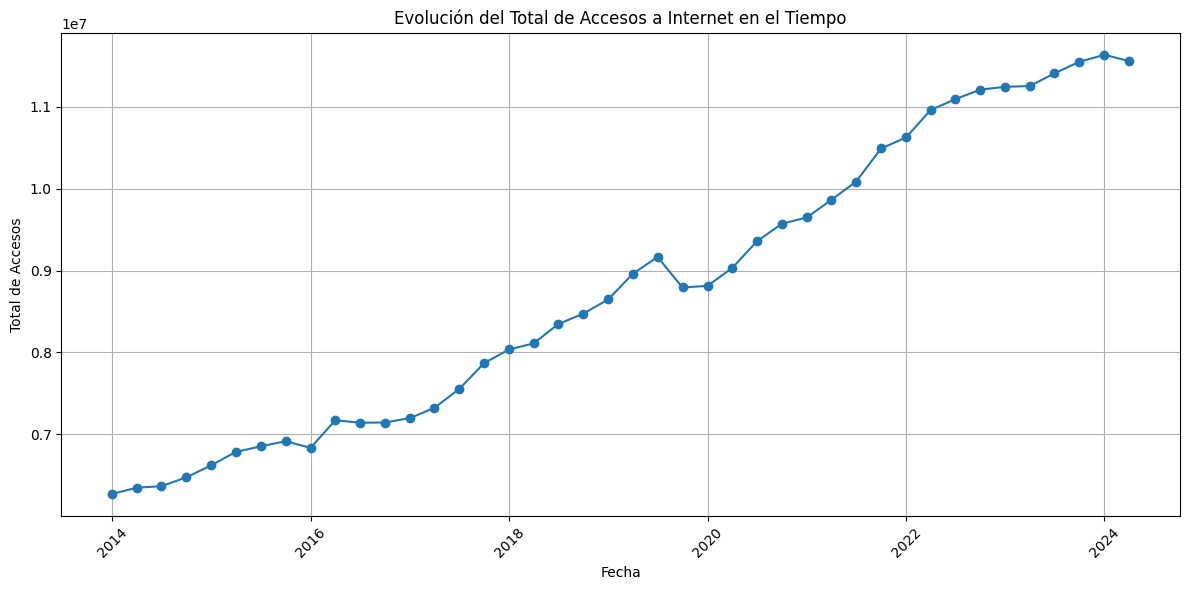

In [22]:

# Convierto 'Año' y 'Trimestre' a enteros
dataset_totales['Año'] = dataset_totales['Año'].astype(int)
dataset_totales['Trimestre'] = dataset_totales['Trimestre'].astype(int)

# Crear una columna de fecha
dataset_totales['Fecha'] = pd.to_datetime(dataset_totales['Año'].astype(str) + 'Q' + dataset_totales['Trimestre'].astype(str))

# Ordenar el dataset por fecha
dataset_totales.sort_values('Fecha', inplace=True)

# Graficar la evolución de los accesos totales
plt.figure(figsize=(12,6))
plt.plot(dataset_totales['Fecha'], dataset_totales['Total'], marker='o')
plt.title('Evolución del Total de Accesos a Internet en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra una tendencia claramente creciente en el total de accesos a internet a lo largo del tiempo, reflejando una expansión constante en el uso de servicios de internet en el país desde 2014 hasta 2024.

## Accesos por cada 100 Hogares por Provincia

C:\Users\User\AppData\Local\Temp\ipykernel_3284\3341681830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_accesos_prov.index, y=dataset_accesos_prov.values, palette="viridis")


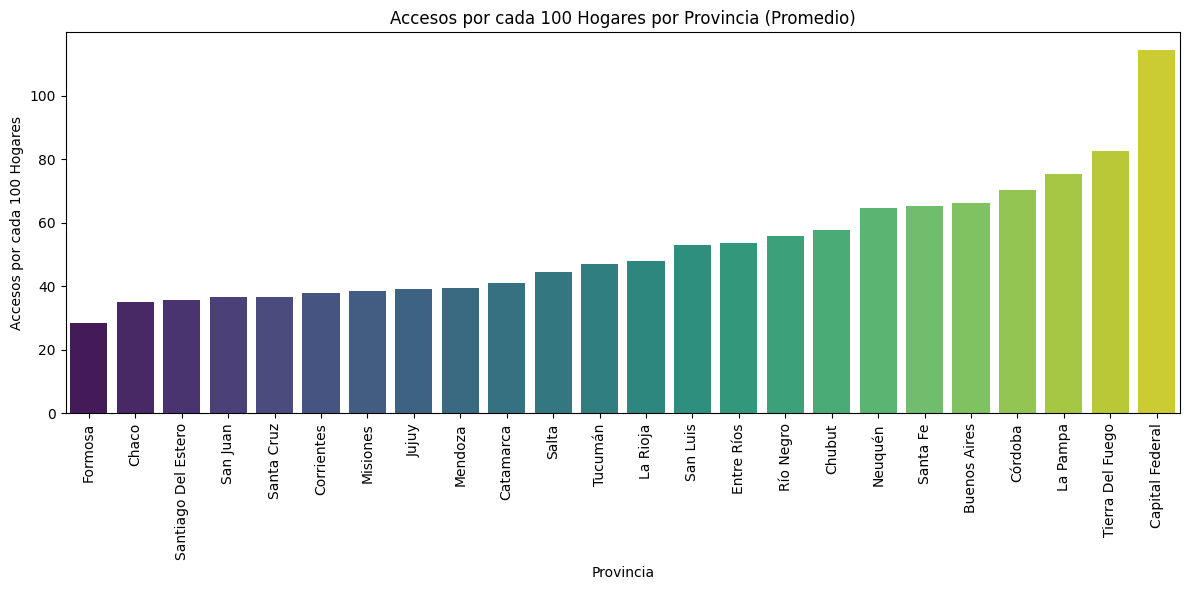

In [23]:
# Ordenar las provincias por accesos por cada 100 hogares
dataset_accesos_prov = dataset_accesos.groupby('Provincia')['Accesos_por_100_hogares'].mean().sort_values()

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x=dataset_accesos_prov.index, y=dataset_accesos_prov.values, palette="viridis")
plt.title('Accesos por cada 100 Hogares por Provincia (Promedio)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Este gráfico muestra la penetración de internet a nivel provincial, medida como el número promedio de accesos por cada 100 hogares.

* Capital Federal tiene la mayor penetración, superando los 100 accesos por cada 100 hogares, lo que indica una cobertura muy alta y posiblemente saturación del mercado.

* Formosa, Chaco y Santiago del Estero tienen las tasas de penetración más bajas (menos de 40 accesos por cada 100 hogares), lo que refleja una brecha digital significativa en estas provincias.

Las provincias con menor penetración (como Formosa y Chaco) representan oportunidades claras de expansión. La empresa podría priorizar inversiones en infraestructura y estrategias de mercado en estas regiones para aumentar la adopción de servicios.



## Distribución de los Accesos por Tipo de Tecnología

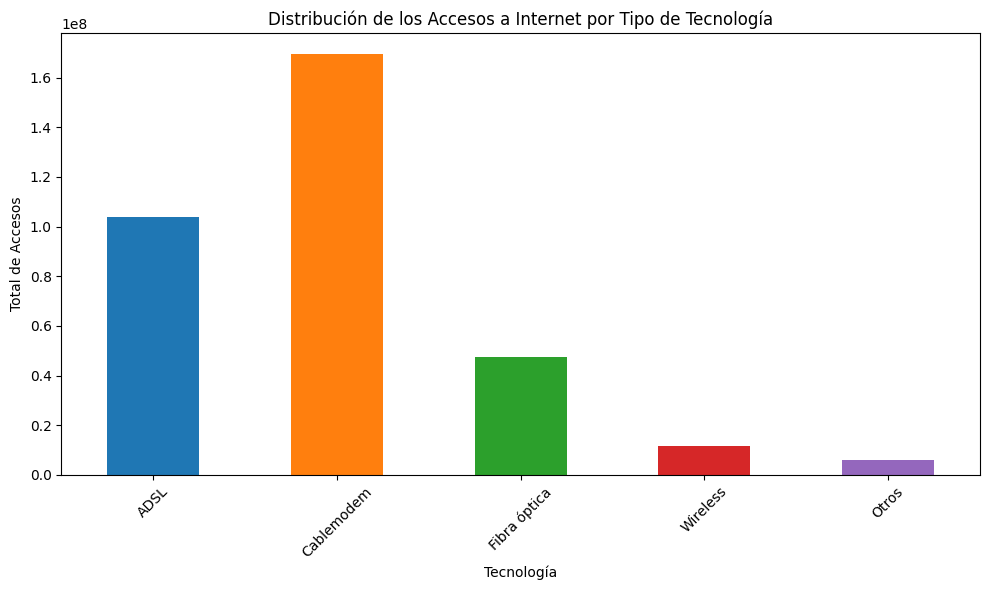

In [24]:
# Sumar accesos por tecnología a nivel nacional
tecnologias_totales = dataset_accesos[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Graficar
plt.figure(figsize=(10,6))
tecnologias_totales.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Distribución de los Accesos a Internet por Tipo de Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Cablemodem domina el mercado con el mayor número de accesos, seguido por ADSL y Fibra Óptica.

* Fibra Óptica, aunque en tercer lugar, muestra un crecimiento constante y representa una tecnología clave para el futuro debido a su mayor capacidad y velocidad.

* Wireless y Otros tienen una participación significativamente menor, probablemente limitados a áreas rurales o con infraestructura limitada.

Este análisis sugiere que Cablemodem y Fibra Óptica deberían ser tecnologías prioritarias para la empresa, especialmente en provincias con menor penetración de internet.
Se podrían explorar inversiones en infraestructura de Fibra Óptica para reemplazar progresivamente el ADSL, especialmente en regiones donde esta última aún es dominante.

## Distribución de Accesos por Rangos de Velocidad

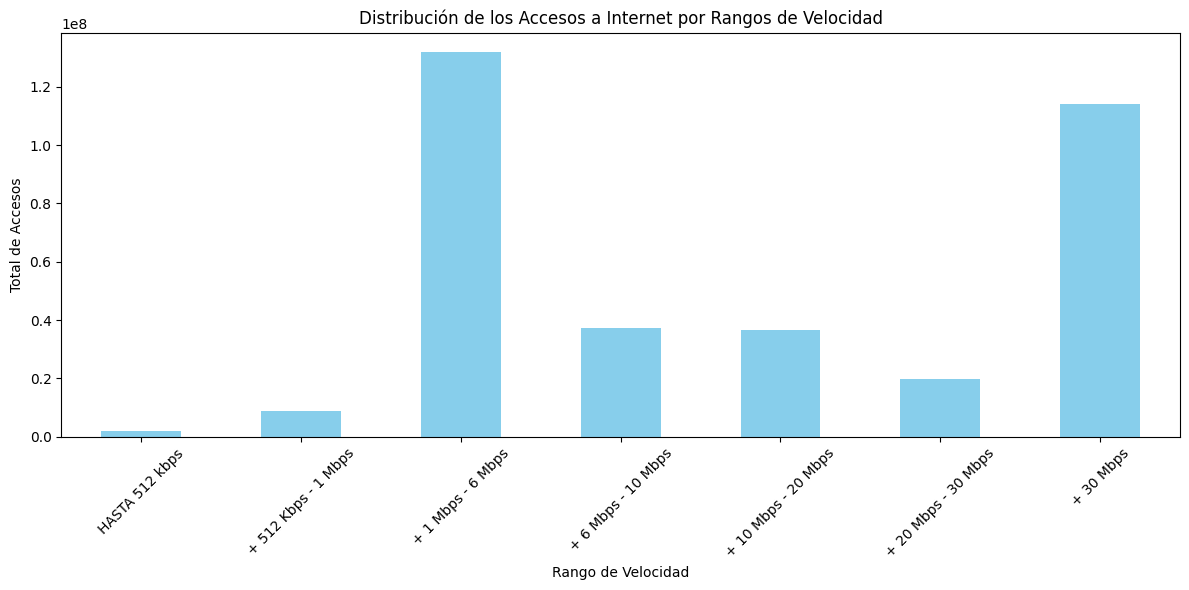

In [25]:
# Sumar accesos por rangos de velocidad a nivel nacional
rangos_velocidad = dataset_accesos[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                                    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps',
                                    '+ 30 Mbps']].sum()

# Graficar
plt.figure(figsize=(12,6))
rangos_velocidad.plot(kind='bar', color='skyblue')
plt.title('Distribución de los Accesos a Internet por Rangos de Velocidad')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* El rango de 1 Mbps a 6 Mbps tiene la mayor cantidad de accesos, indicando que sigue siendo una velocidad popular, probablemente debido a su bajo costo y accesibilidad.

* Los accesos a velocidades superiores a 30 Mbps son el segundo grupo más grande, lo que refleja una creciente demanda por conexiones de alta velocidad.

* Los rangos de velocidad más bajos (menos de 1 Mbps) tienen una presencia casi nula, sugiriendo que están en desuso o son marginales.

El mercado muestra una transición hacia velocidades más altas, lo que representa una oportunidad para la empresa de impulsar planes con velocidades superiores a 30 Mbps en regiones con menor adopción.

## Aumento del 2% en Accesos por Cada 100 Hogares

C:\Users\User\AppData\Local\Temp\ipykernel_3284\3074366344.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provincia', y='KPI (%)', data=kpi_data, palette='coolwarm')


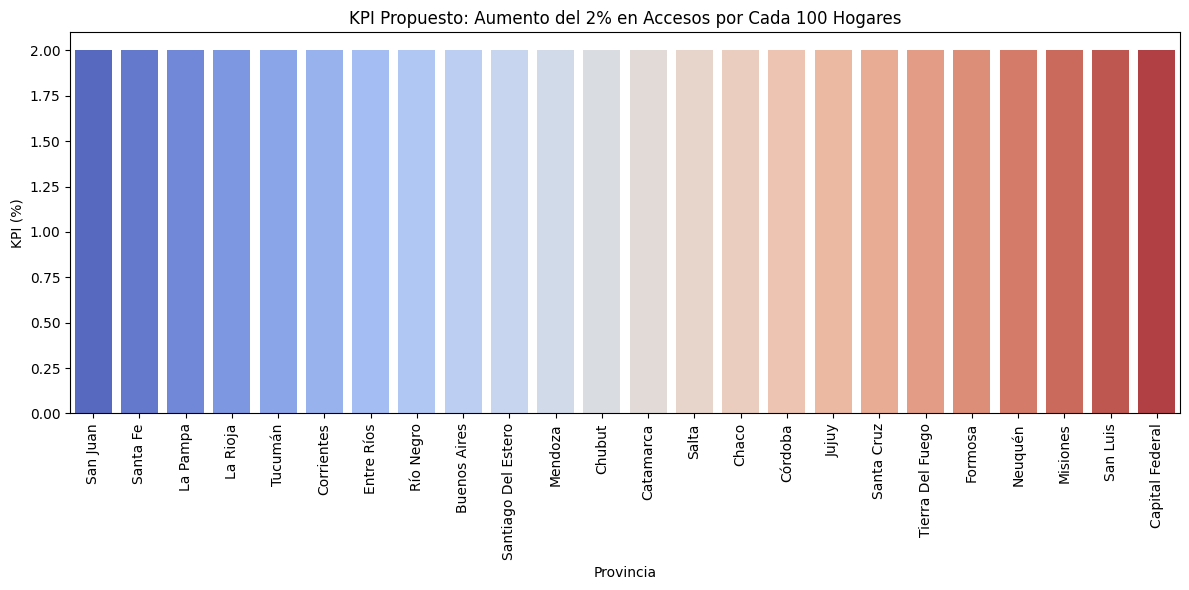

In [26]:
# Crear una copia del dataset para trabajar con el KPI
kpi_data = dataset_accesos[['Provincia', 'Accesos_por_100_hogares']].copy()

# Calcular el nuevo acceso con un aumento del 2%
kpi_data['Nuevo acceso'] = kpi_data['Accesos_por_100_hogares'] * 1.02

# Calcular el KPI
kpi_data['KPI (%)'] = ((kpi_data['Nuevo acceso'] - kpi_data['Accesos_por_100_hogares']) /
                       kpi_data['Accesos_por_100_hogares']) * 100

# Ordenar las provincias por KPI calculado
kpi_data.sort_values(by='KPI (%)', ascending=False, inplace=True)

# Graficar el KPI por provincia
plt.figure(figsize=(12,6))
sns.barplot(x='Provincia', y='KPI (%)', data=kpi_data, palette='coolwarm')
plt.title('KPI Propuesto: Aumento del 2% en Accesos por Cada 100 Hogares')
plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Todas las provincias exhiben un aumento constante cercano al 2%, como era de esperar, ya que se aplica un incremento uniforme basado en los accesos actuales.

## Tasa de Crecimiento Trimestral de Accesos a Internet

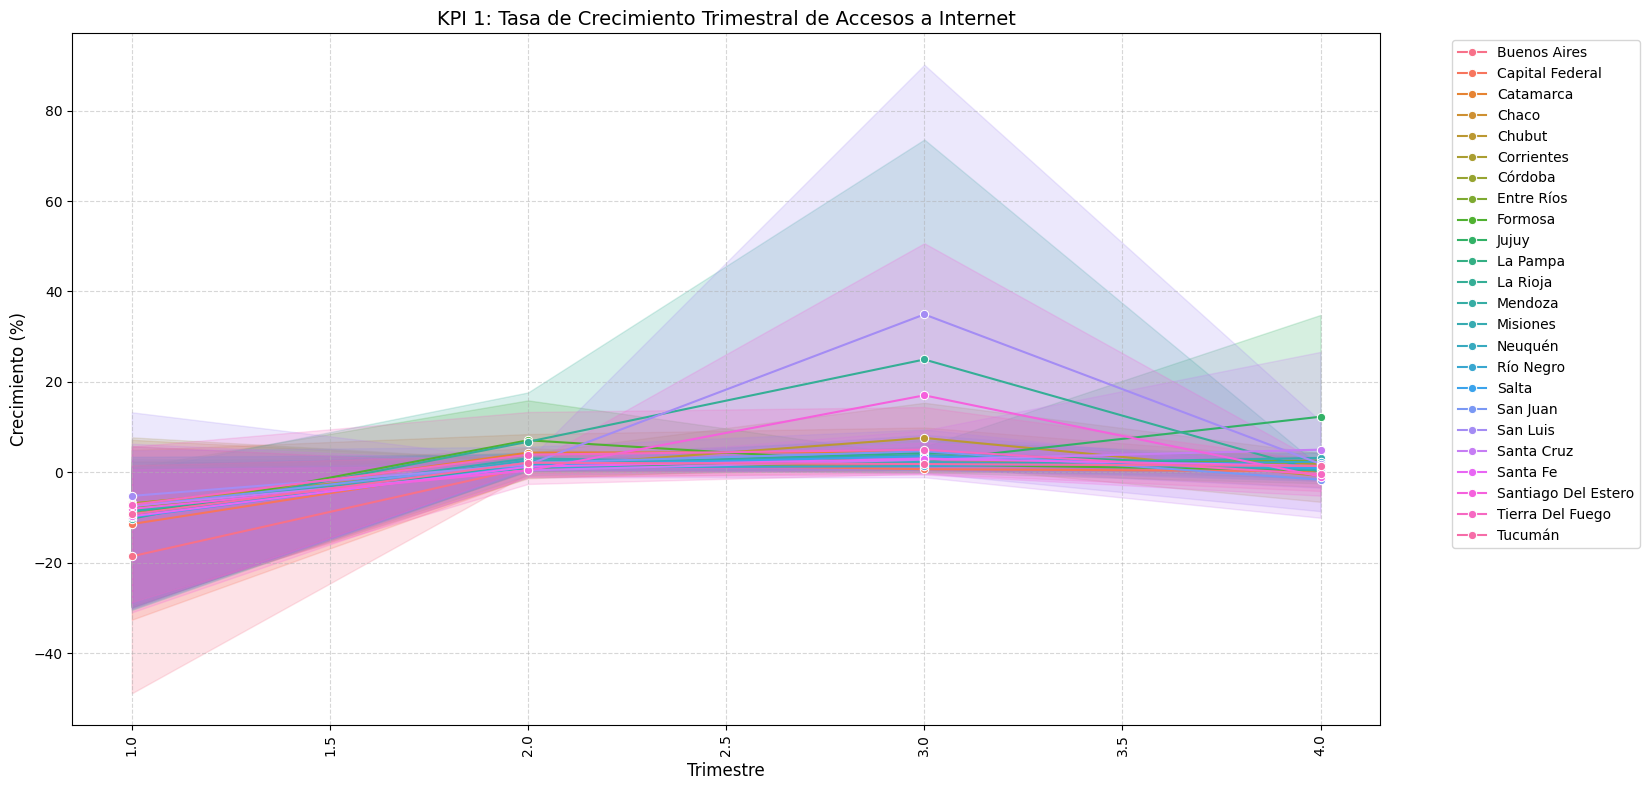

In [27]:
# Crear una copia del dataset para calcular el crecimiento
growth_data = dataset_accesos[['Año', 'Trimestre', 'Provincia', 'Total_x']].copy()

# Ordenar el dataset por provincia y fecha para calcular el crecimiento
growth_data.sort_values(by=['Provincia', 'Año', 'Trimestre'], inplace=True)

# Calcular el crecimiento trimestral (Tasa de Crecimiento)
growth_data['Crecimiento (%)'] = growth_data.groupby('Provincia')['Total_x'].pct_change() * 100

# Filtrar los valores no nulos (primer trimestre por provincia no tiene cambio)
growth_data = growth_data.dropna()

# Graficar la Tasa de Crecimiento Trimestral
plt.figure(figsize=(14,8))
sns.lineplot(data=growth_data, x='Trimestre', y='Crecimiento (%)', hue='Provincia', marker='o')
plt.title('KPI 1: Tasa de Crecimiento Trimestral de Accesos a Internet', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Crecimiento (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


* Algunas provincias, como San Juan y Formosa, muestran picos de crecimiento positivos significativos en ciertos trimestres.
* Otras, como Capital Federal, tienen valores negativos o cercanos a cero, indicando saturación del mercado.
* Este KPI permite identificar oportunidades de crecimiento en regiones específicas donde la tasa intertrimestral sigue siendo alta (como en provincias menos desarrolladas digitalmente).
* Las provincias con crecimiento bajo o negativo pueden requerir estrategias alternativas, como la introducción de nuevas tecnologías o la mejora de la infraestructura existente.

## Crecimiento de Ingresos por Servicios de Internet

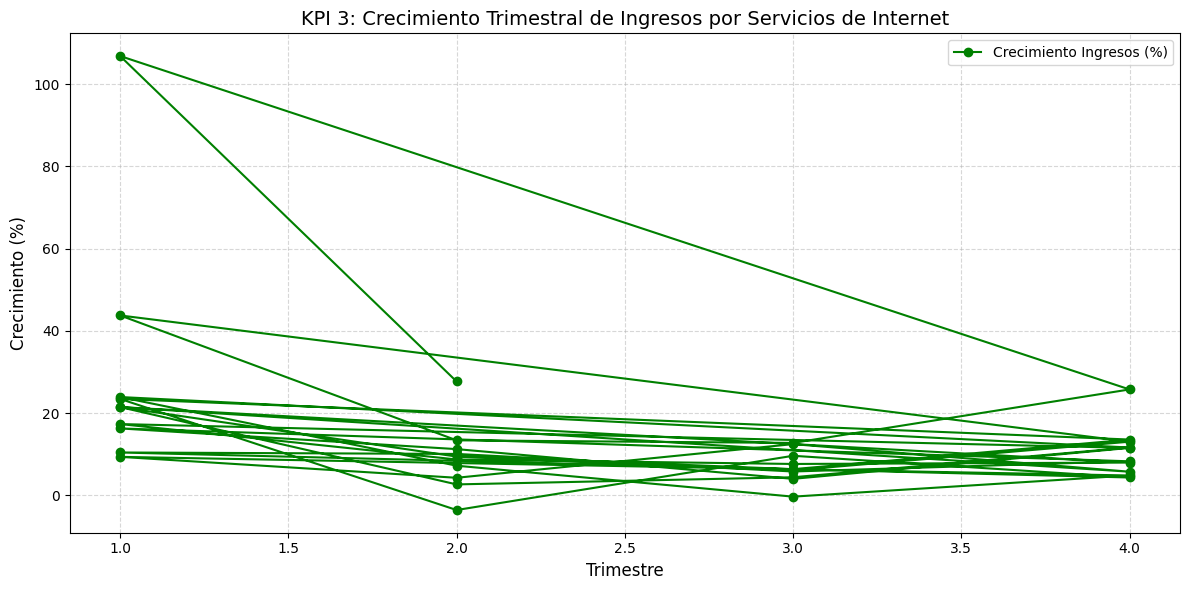

In [28]:
# Crear una copia del dataset para trabajar
ingresos_data = dataset_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)']].copy()

# Ordenar por año y trimestre
ingresos_data.sort_values(by=['Año', 'Trimestre'], inplace=True)

# Calcular el crecimiento trimestral de ingresos
ingresos_data['Crecimiento Ingresos (%)'] = ingresos_data['Ingresos (miles de pesos)'].pct_change() * 100

# Filtrar valores nulos generados por el cálculo
ingresos_data = ingresos_data.dropna()

# Graficar el crecimiento trimestral de ingresos
plt.figure(figsize=(12,6))
plt.plot(ingresos_data['Trimestre'], ingresos_data['Crecimiento Ingresos (%)'], marker='o', color='green', label='Crecimiento Ingresos (%)')
plt.title('KPI 3: Crecimiento Trimestral de Ingresos por Servicios de Internet', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Crecimiento (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


* Existe una alta dispersión entre trimestres y provincias, lo que dificulta la identificación de patrones claros.
* La mayoría de los valores se concentran entre el 0% y el 20% de crecimiento.

## Graficar Ingresos por Acceso por Año

C:\Users\User\AppData\Local\Temp\ipykernel_3284\436752708.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Ingresos por Acceso', data=tech_ingresos, palette="viridis")


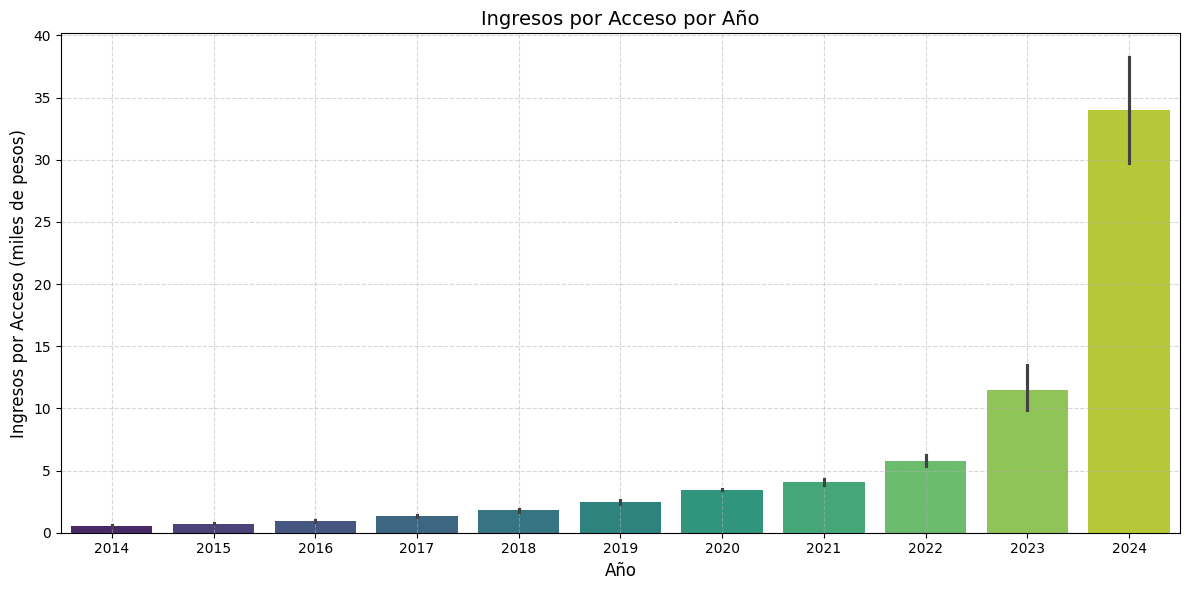

In [29]:
# Crear una copia del dataset para trabajar
tech_ingresos = dataset_ingresos[['Año', 'Ingresos (miles de pesos)', 'Total']].copy()

# Calcular los ingresos por acceso
tech_ingresos['Ingresos por Acceso'] = tech_ingresos['Ingresos (miles de pesos)'] / tech_ingresos['Total']

# Graficar ingresos por acceso por año
plt.figure(figsize=(12,6))
sns.barplot(x='Año', y='Ingresos por Acceso', data=tech_ingresos, palette="viridis")
plt.title('Ingresos por Acceso por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ingresos por Acceso (miles de pesos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


* Se observa un crecimiento constante en los ingresos por acceso desde 2020, con un aumento significativo en 2024, lo que sugiere una mejora en la monetización de los servicios de internet.

* Este comportamiento podría estar vinculado a incrementos en las tarifas, mayor penetración de tecnologías premium (como fibra óptica) o mejoras en los planes ofrecidos.

* A partir de 2020, se aprecia una aceleración en el crecimiento, probablemente impulsada por la mayor dependencia de los servicios de internet durante la pandemia y la transición hacia tecnologías de mayor calidad.



### Hallazgos Clave a Partir de los KPIs:

**KPI Propuesto: Aumento del 2% en Accesos por Cada 100 Hogares:**
 
* El impacto del aumento proyectado es homogéneo a nivel nacional, pero provincias con menor penetración (como Formosa y Chaco) representan oportunidades significativas de crecimiento.

**KPI 1: Crecimiento Trimestral de Accesos:**

* Provincias como San Juan y Formosa destacan por su alta tasa de crecimiento, lo que indica un fuerte desarrollo del mercado en regiones con baja saturación.

**KPI 2: Distribución de Accesos por Tecnología:**
 
* La fibra óptica, aunque aún no dominante, muestra un crecimiento consistente, consolidándose como la tecnología del futuro en el sector.

**KPI 3: Crecimiento de Ingresos por Acceso:**

* El ingreso por acceso alcanzó un máximo histórico en 2024, destacando la importancia de las estrategias orientadas a planes premium y mayor calidad del servicio.

### Conclusiones y Decisiones Basadas en Datos:

**Oportunidades de Expansión:**
- Provincias con baja penetración (Formosa, Chaco) presentan un potencial significativo para expandir servicios mediante inversiones en infraestructura y despliegue de tecnologías premium.

**Inversión en Fibra Óptica:**
- La transición hacia tecnologías de mayor calidad, como la fibra óptica, no solo mejora la experiencia del usuario, sino que también aumenta la rentabilidad por acceso.

**Enfoque en Segmentación Estratégica:**
- Implementar estrategias diferenciadas según la madurez de cada mercado:
  - Provincias Saturadas: Innovación en servicios complementarios y fidelización.
  - Provincias en Crecimiento: Expansión agresiva con enfoque en accesibilidad y tecnología de calidad.

En conclusión, los datos y KPIs analizados confirman que las telecomunicaciones están en un momento de transformación tecnológica y expansión, con oportunidades claras de crecimiento en mercados emergentes y la consolidación de tecnologías premium como el principal motor de ingresos.

### Exportar data

In [30]:

# Crear CSV para dataset_accesos
dataset_accesos.to_csv('dataset_accesos.csv', index=False) 

# Crear CSV para dataset_totales
dataset_totales.to_csv('dataset_totales.csv', index=False) 

# Crear CSV para dataset_ingresos
dataset_ingresos.to_csv('dataset_ingresos.csv', index=False)